In [351]:
# SVC Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [352]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC

In [353]:
# Importing the dataset
dataset = pd.read_csv(r"C:\Users\Prajyot\Downloads\iris.csv")

In [354]:
#looking at the first 5 values of the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [355]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [356]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [357]:
print("Training data size: ",X_train.shape)
print("Training label size: ",y_train.shape)
print("Testing data size: ",X_test.shape)
print("Testing label size: ",y_test.shape)

Training data size:  (120, 4)
Training label size:  (120,)
Testing data size:  (30, 4)
Testing label size:  (30,)


In [358]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# RBF Kernel

In [359]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

C_range = np.logspace(-2, 2, 4)
gamma_range = np.logspace(-2, 2, 4)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 4.6415888336127775, 'gamma': 0.01} with a score of 0.97


In [360]:
# from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

# C_range = np.logspace(-2, 2, 4)
# gamma_range = [0.01]
# param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
# grid.fit(X, y)

# print(
#     "The best parameters are %s with a score of %0.2f"
#     % (grid.best_params_, grid.best_score_)
# )

In [361]:
# print(grid.cv_results_.keys())

In [362]:
# print(grid.cv_results_['param_C'])

In [363]:
# # importing package
# import matplotlib.pyplot as plt
# x = grid.cv_results_['param_C']
# y = grid.cv_results_['mean_test_score']

# # plot line
# plt.plot(x, y)
# plt.title("Accuracy vs C")
# plt.xlabel("C")
# plt.ylabel("Accuracy")

# plt.show()

In [364]:
svcclassifier = SVC(kernel = 'rbf', gamma = 0.01, C = 4.6415888336127775, random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [365]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]

            n_classes = cm.shape[0]

for i in range(n_classes):
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(sum(cm)) - tp - fn - fp
    
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    
    print(f"Class {i}: TPR = {tpr:.2f}, TNR = {tnr:.2f}")
    
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelRbfAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

Confusion Matrix:
[[11  0  0]
 [ 0  8  1]
 [ 0  2  8]]
Class 0: TPR = 1.00, TNR = 1.00
Class 1: TPR = 0.89, TNR = 0.90
Class 2: TPR = 0.80, TNR = 0.95
Correct predictions:  27
False predictions 3
Accuracy of the SVC Clasification is:  0.9


# Sigmoid Kernel

In [366]:
# For the sigmoid kernel

C_range = np.logspace(-2, 2, 4)
gamma_range = np.logspace(-2, 2, 4)
coef0_range = np.logspace(-5, 5, 4)
param_grid = dict(gamma=gamma_range, C=C_range, coef0=coef0_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='sigmoid'), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 4.6415888336127775, 'coef0': 0.021544346900318846, 'gamma': 0.01} with a score of 0.86


In [367]:
# # For the sigmoid kernel

# C_range = [4.6415888336127775]
# coef0_range = [0.021544346900318846]
# gamma_range = np.logspace(-2, 2, 4)
# param_grid = dict(gamma=gamma_range, C=C_range, coef0=coef0_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# grid = GridSearchCV(SVC(kernel='sigmoid'), param_grid=param_grid, cv=cv)
# grid.fit(X, y)

# print(
#     "The best parameters are %s with a score of %0.2f"
#     % (grid.best_params_, grid.best_score_)
# )

In [368]:
# print(grid.cv_results_.keys())

In [369]:
# print(grid.cv_results_['param_gamma'])

In [370]:
# # importing package
# import matplotlib.pyplot as plt
# x = grid.cv_results_['param_gamma']
# y = grid.cv_results_['mean_test_score']

# # plot line
# plt.plot(x, y)
# plt.title("Accuracy vs gamma")
# plt.xlabel("C")
# plt.ylabel("Accuracy")

# plt.show()

In [371]:
svcclassifier = SVC(kernel = 'sigmoid', C =4.6415888336127775 , coef0=0.021544346900318846 , gamma = 0.01, random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [372]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
            
n_classes = cm.shape[0]

for i in range(n_classes):
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(sum(cm)) - tp - fn - fp
    
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    
    print(f"Class {i}: TPR = {tpr:.2f}, TNR = {tnr:.2f}")
    
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelSigmoidAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

Confusion Matrix:
[[11  0  0]
 [ 0  8  1]
 [ 0  2  8]]
Class 0: TPR = 1.00, TNR = 1.00
Class 1: TPR = 0.89, TNR = 0.90
Class 2: TPR = 0.80, TNR = 0.95
Correct predictions:  27
False predictions 3
Accuracy of the SVC Clasification is:  0.9


# Polynomial Kernel

In [373]:
# For the polynomial kernel

C_range = np.logspace(-2, 2, 4)
gamma_range = np.logspace(-2, 2, 4)
coef0_range = np.logspace(-2, 2, 4)
degree_range = [0,1,2,3,4]
param_grid = dict(gamma=gamma_range, C=C_range, coef0=coef0_range, degree=degree_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.01, 'coef0': 100.0, 'degree': 2, 'gamma': 0.21544346900318834} with a score of 0.99


In [374]:
# # For the polynomial kernel

# C_range = [0.01]
# gamma_range = [0.21544346900318834]
# coef0_range = [100]
# degree_range = [0,1,2,3,4]
# param_grid = dict(gamma=gamma_range, C=C_range, coef0=coef0_range, degree=degree_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# grid = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)
# grid.fit(X, y)

# print(
#     "The best parameters are %s with a score of %0.2f"
#     % (grid.best_params_, grid.best_score_)
# )

In [375]:
# print(grid.cv_results_.keys())

In [376]:
# print(grid.cv_results_['param_degree'])

In [377]:
# # importing package
# import matplotlib.pyplot as plt
# x = grid.cv_results_['param_degree']
# y = grid.cv_results_['mean_test_score']

# # plot line
# plt.plot(x, y)
# plt.title("Accuracy vs degree")
# plt.xlabel("C")
# plt.ylabel("Accuracy")

# plt.show()

In [378]:
svcclassifier = SVC(kernel = 'poly', C = 0.01 , coef0 =  100.0,degree=2, gamma = 0.21544346900318834, random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [379]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
            
n_classes = cm.shape[0]

for i in range(n_classes):
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(sum(cm)) - tp - fn - fp
    
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    
    print(f"Class {i}: TPR = {tpr:.2f}, TNR = {tnr:.2f}")
    
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelPolyAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

Confusion Matrix:
[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]
Class 0: TPR = 1.00, TNR = 1.00
Class 1: TPR = 0.89, TNR = 1.00
Class 2: TPR = 1.00, TNR = 0.95
Correct predictions:  29
False predictions 1
Accuracy of the SVC Clasification is:  0.9666666666666667


[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]
Class 0: AUROC = nan
Class 1: AUROC = nan
Class 2: AUROC = nan


C:\Users\Prajyot\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Prajyot\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Prajyot\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


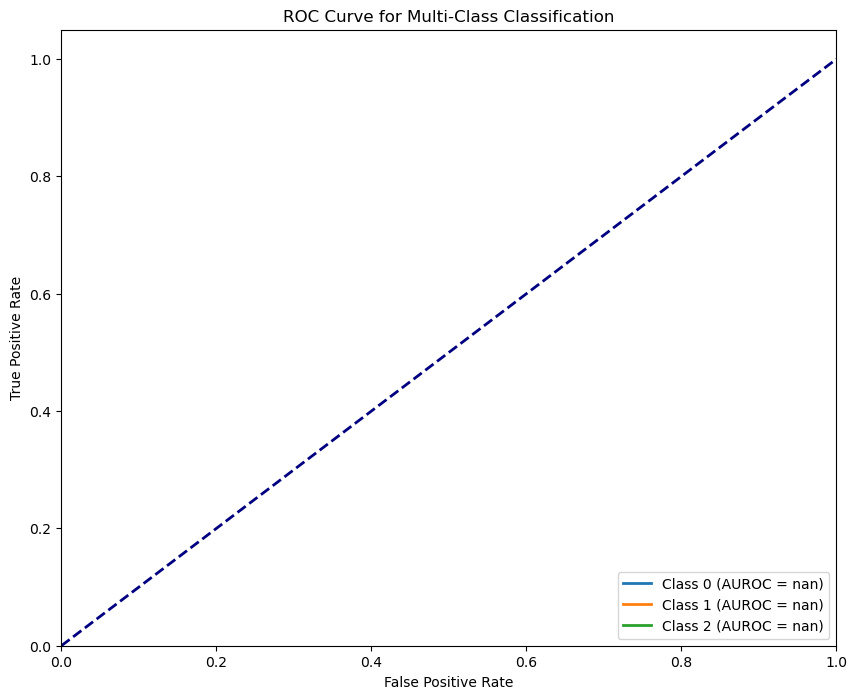

In [332]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

n_classes = cm.shape[0]

# Calculate ROC and AUROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(sum(cm)) - tp - fn - fp

    fpr[i], tpr[i], _ = roc_curve([1 if j == i else 0 for j in y_test], [1 if j == i else 0 for j in y_pred])
    roc_auc[i] = auc(fpr[i], tpr[i])

    print(f"Class {i}: AUROC = {roc_auc[i]:.2f}")

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUROC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()
